In [795]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score

In [796]:
#Reads the csv files from kaggle (https://www.kaggle.com/c/titanic/data)
raw_data_test = pd.read_csv("/Users/paco/Desktop/Location/titanic/test.csv")
raw_data_train = pd.read_csv("/Users/paco/Desktop/Location/titanic/train.csv")

In [797]:
#The concatination of both training data set and testing data set
raw_data = [raw_data_train, raw_data_test]
data_com = pd.concat(raw_data)
data_com

/Users/paco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


# CSV Ledgend
survival = 0 = No, 1 = Yes
pclass = 1 : 1st, 2 :2nd, 3 : 3rd
sex	= gender
Age = Age in years	
sibsp = # of siblings / spouses aboard the Titanic	
parch = # of parents / children aboard the Titanic	
ticket = Ticket number	
fare = Passenger fare	
cabin= Cabin number	
embarked = Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [798]:
data_com.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [799]:
#A description for the 7 categories below
data_cols = ['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp', 'Survived']
data_com[data_cols].describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [800]:
data_com[data_cols].mean()

Age             29.881138
Fare            33.295479
Parch            0.385027
PassengerId    655.000000
Pclass           2.294882
SibSp            0.498854
Survived         0.383838
dtype: float64

In [801]:
data_com[data_cols].min()

Age            0.17
Fare           0.00
Parch          0.00
PassengerId    1.00
Pclass         1.00
SibSp          0.00
Survived       0.00
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a1e0e10>,
      dtype=object)

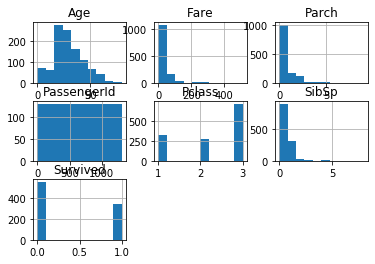

In [802]:
data_com[data_cols].hist()

In [803]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


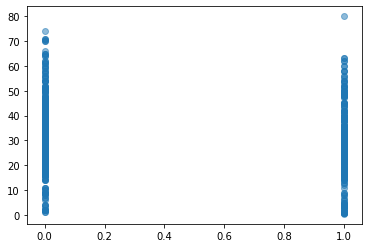

In [804]:
x = data_com['Survived']
y = data_com['Age']
plt.scatter(x, y, alpha=0.5)

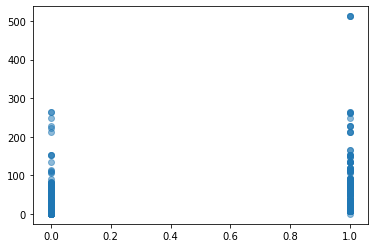

In [805]:
x = data_com['Survived']
y = data_com['Fare']
plt.scatter(x, y, alpha=0.5)

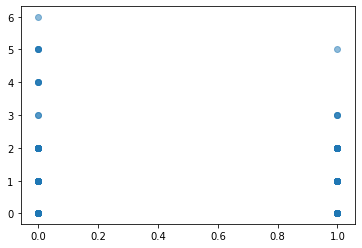

In [806]:
x = data_com['Survived']
y = data_com['Parch']
plt.scatter(x, y, alpha=0.5)

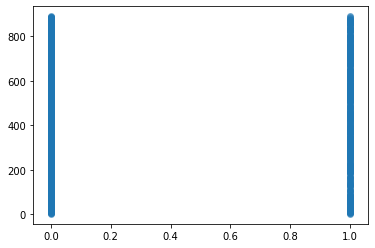

In [807]:
x = data_com['Survived']
y = data_com['PassengerId']
plt.scatter(x, y, alpha=0.5)

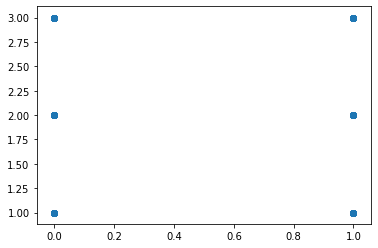

In [808]:
x = data_com['Survived']
y = data_com['Pclass']
plt.scatter(x, y, alpha=0.5)

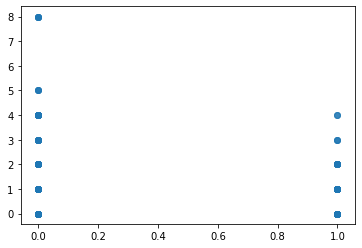

In [809]:
x = data_com['Survived']
y = data_com['SibSp']
plt.scatter(x, y, alpha=0.5)

In [810]:
print(np.corrcoef(data_com['Age'], data_com['Survived'])[0,1])
print(np.corrcoef(data_com['Fare'], data_com['Survived'])[0,1])
print(np.corrcoef(data_com['Pclass'], data_com['Survived'])[0,1])
print(np.corrcoef(data_com['Parch'], data_com['Survived'])[0,1])
print(np.corrcoef(data_com['PassengerId'], data_com['Survived'])[0,1])
print(np.corrcoef(data_com['SibSp'], data_com['Survived'])[0,1])

nan
nan
nan
nan
nan
nan


In [811]:
revise_data = data_com[['PassengerId', 'Name', 'Age', 'Sex' ,'Pclass', 'Embarked', 'Survived']].copy()
revise_data

,PassengerId,Name,Age,Sex,Pclass,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",22.0,male,3,S,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,C,1.0
2,3,"Heikkinen, Miss. Laina",26.0,female,3,S,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,S,1.0
4,5,"Allen, Mr. William Henry",35.0,male,3,S,0.0
5,6,"Moran, Mr. James",NaN,male,3,Q,0.0
6,7,"McCarthy, Mr. Timothy J",54.0,male,1,S,0.0
7,8,"Palsson, Master. Gosta Leonard",2.0,male,3,S,0.0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,female,3,S,1.0
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,female,2,C,1.0


In [812]:
revise_data.isnull().sum()

PassengerId      0
Name             0
Age            263
Sex              0
Pclass           0
Embarked         2
Survived       418
dtype: int64

In [813]:
revise_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [814]:
allvalue_data = revise_data.copy()

In [815]:
allvalue_data['Age'] = allvalue_data['Age'].fillna(allvalue_data['Age'].median())
allvalue_data['Survived'] = allvalue_data['Survived'].fillna(0)
allvalue_data['Embarked'] = allvalue_data['Embarked'].fillna('S')

In [816]:
allvalue_data.isnull().sum()

PassengerId    0
Name           0
Age            0
Sex            0
Pclass         0
Embarked       0
Survived       0
dtype: int64

In [817]:
allvalue_data

,PassengerId,Name,Age,Sex,Pclass,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",22.0,male,3,S,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,C,1.0
2,3,"Heikkinen, Miss. Laina",26.0,female,3,S,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,S,1.0
4,5,"Allen, Mr. William Henry",35.0,male,3,S,0.0
5,6,"Moran, Mr. James",28.0,male,3,Q,0.0
6,7,"McCarthy, Mr. Timothy J",54.0,male,1,S,0.0
7,8,"Palsson, Master. Gosta Leonard",2.0,male,3,S,0.0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,female,3,S,1.0
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,female,2,C,1.0


# Stage 2

In [818]:
gen_num = { 'Sex' : {'male': 0 , 'female' : 1}}
allvalue_data.replace(gen_num, inplace = True)

In [819]:
allvalue_data

,PassengerId,Name,Age,Sex,Pclass,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",22.0,0,3,S,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,1,C,1.0
2,3,"Heikkinen, Miss. Laina",26.0,1,3,S,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,1,S,1.0
4,5,"Allen, Mr. William Henry",35.0,0,3,S,0.0
5,6,"Moran, Mr. James",28.0,0,3,Q,0.0
6,7,"McCarthy, Mr. Timothy J",54.0,0,1,S,0.0
7,8,"Palsson, Master. Gosta Leonard",2.0,0,3,S,0.0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,1,3,S,1.0
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,2,C,1.0


In [820]:
allvalue_data.dtypes

PassengerId      int64
Name            object
Age            float64
Sex              int64
Pclass           int64
Embarked        object
Survived       float64
dtype: object

In [821]:
allvalue_data = pd.get_dummies(allvalue_data, columns=['Embarked'])

In [822]:
allvalue_data

,PassengerId,Name,Age,Sex,Pclass,Survived,Embarked_C,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",22.0,0,3,0.0,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,1,1.0,1,0,0
2,3,"Heikkinen, Miss. Laina",26.0,1,3,1.0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,1,1.0,0,0,1
4,5,"Allen, Mr. William Henry",35.0,0,3,0.0,0,0,1
5,6,"Moran, Mr. James",28.0,0,3,0.0,0,1,0
6,7,"McCarthy, Mr. Timothy J",54.0,0,1,0.0,0,0,1
7,8,"Palsson, Master. Gosta Leonard",2.0,0,3,0.0,0,0,1
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,1,3,1.0,0,0,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,2,1.0,1,0,0


In [823]:
scaler = StandardScaler()

In [824]:
scaler.fit(allvalue_data[['PassengerId', 'Age', 'Sex' ,'Pclass', 'Embarked_C','Embarked_Q','Embarked_S', 'Survived']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [825]:
training_data = allvalue_data[0:891].copy()
testing_data = allvalue_data[891:1310].copy()

In [826]:
train, validation = train_test_split(training_data, test_size=0.2)

In [827]:
input_cols = ['Age', 'Sex' ,'Pclass', 'Embarked_C','Embarked_Q','Embarked_S']

In [828]:
model_svm = LinearSVC()
model_svm.fit(train[input_cols], train['Survived'])

/Users/paco/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [829]:
model_3nn = KNeighborsClassifier(n_neighbors=3)
model_3nn.fit(train[input_cols], train['Survived'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [830]:
model_log = LogisticRegression(solver='lbfgs')
model_log.fit(train[input_cols], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Stage 3

In [831]:
predictSVM = model_svm.predict(train[input_cols])

In [832]:
scores = cross_val_score(model_svm, train[input_cols], train['Survived'], cv = 3)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.81932773 0.69327731 0.79661017]


/Users/paco/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/paco/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/paco/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [833]:
mat = confusion_matrix(predictSVM, train['Survived'])
print(mat)

[[385  97]
 [ 40 190]]


In [834]:
 precision_score(train['Survived'], predictSVM, average='macro')

0.8124210716218654

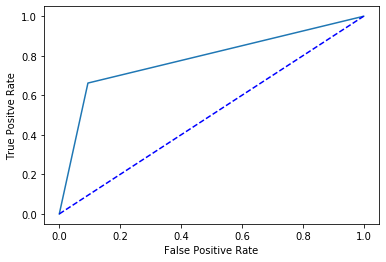

In [835]:
fpr, tpr, thresholds = roc_curve(train['Survived'], predictSVM)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')

plt.plot([0, 1], [0, 1], 'b--')

In [836]:
roc_auc_score(train['Survived'], predictSVM)

0.7839516294322606

In [837]:
predict3nn = model_3nn.predict(train[input_cols])

In [838]:
scores = cross_val_score(model_3nn, train[input_cols], train['Survived'], cv = 3)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.81932773 0.75630252 0.72457627]


In [839]:
mat = confusion_matrix(predict3nn, train['Survived'])
print(mat)

[[386  62]
 [ 39 225]]


In [840]:
precision_score(train['Survived'], predict3nn, average='macro')

0.8569399350649352

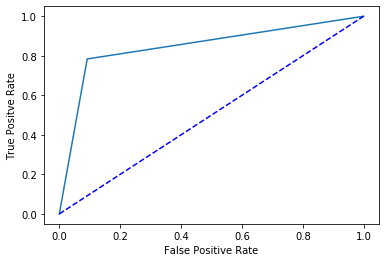

In [841]:
fpr, tpr, thresholds = roc_curve(train['Survived'], predict3nn)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')

plt.plot([0, 1], [0, 1], 'b--')

In [842]:
roc_auc_score(train['Survived'], predict3nn)

0.8461037097765935

In [843]:
predictLOG = model_log.predict(train[input_cols])

In [844]:
scores = cross_val_score(model_log, train[input_cols], train['Survived'], cv = 3)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.81512605 0.7394958  0.80084746]


In [845]:
mat = confusion_matrix(predictLOG, train['Survived'])
print(mat)

[[354  76]
 [ 71 211]]


In [846]:
precision_score(train['Survived'], predictLOG, average='macro')

0.7857413821540491

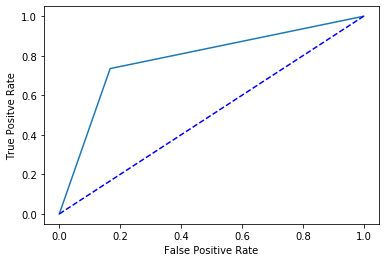

In [847]:
fpr, tpr, thresholds = roc_curve(train['Survived'], predictLOG)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')

plt.plot([0, 1], [0, 1], 'b--')

In [848]:
roc_auc_score(train['Survived'], predictLOG)

0.7840664070506252

# Conlusions

Based on the findings I have the best model for predicting the out come of people surviving the Titianic event would be the K-nearest neighbor model due to the high accuracy and precision rate that have been found.

In [849]:
predict3nn = model_3nn.predict(testing_data[input_cols])
print (predict3nn)

[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.

In [851]:
testing_data['Prediction on Survival'] = model_3nn.predict(testing_data[input_cols])
testing_data

,PassengerId,Name,Age,Sex,Pclass,Survived,Embarked_C,Embarked_Q,Embarked_S,Prediction on Survival
0,892,"Kelly, Mr. James",34.5,0,3,0.0,0,1,0,0.0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,3,0.0,0,0,1,0.0
2,894,"Myles, Mr. Thomas Francis",62.0,0,2,0.0,0,1,0,1.0
3,895,"Wirz, Mr. Albert",27.0,0,3,0.0,0,0,1,1.0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,3,0.0,0,0,1,1.0
5,897,"Svensson, Mr. Johan Cervin",14.0,0,3,0.0,0,0,1,0.0
6,898,"Connolly, Miss. Kate",30.0,1,3,0.0,0,1,0,0.0
7,899,"Caldwell, Mr. Albert Francis",26.0,0,2,0.0,0,0,1,0.0
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,1,3,0.0,1,0,0,0.0
9,901,"Davies, Mr. John Samuel",21.0,0,3,0.0,0,0,1,0.0


# Results

The dataframe above shows the prediction of the test data set of who would most likely survive the Titanic event with the results of 'Survived' being all the null values turned to 0 and the 'Predictions on Survival' the prediction model from K-nearest neighbor.